# Project 1 with Linear Regression

Problem Statement : We need to Predict the chance of Admission based on Various Student Scores.

Features or Independent Variables :
* GRE score
* TOEFL score
* University Ranking
* SOP
* LOR
* CGPA
* Research

Label/Target
* Chance of Admit

In [34]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
data=pd.read_csv(r'C:\Users\joshi\Downloads\Admission_Prediction (1).csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
#checking the shape
data.shape

(500, 9)

# Data Preprocessing Steps

1) Data Cleaning

2) EDA (Analysis)

3) Finding and Treating Outliers (if any)

4) Feature selection for model building

5) Data Standardization

6) Train Test Split

In [4]:
#getting the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [5]:
#dropping unwanted columns
data=data.drop(columns=['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [6]:
#checking the statistics of data
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
#filling the null values
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['TOEFL Score'].fillna(data['GRE Score'].mean())
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,107.187755,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,6.051338,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,92.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,103.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,107.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,112.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,120.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


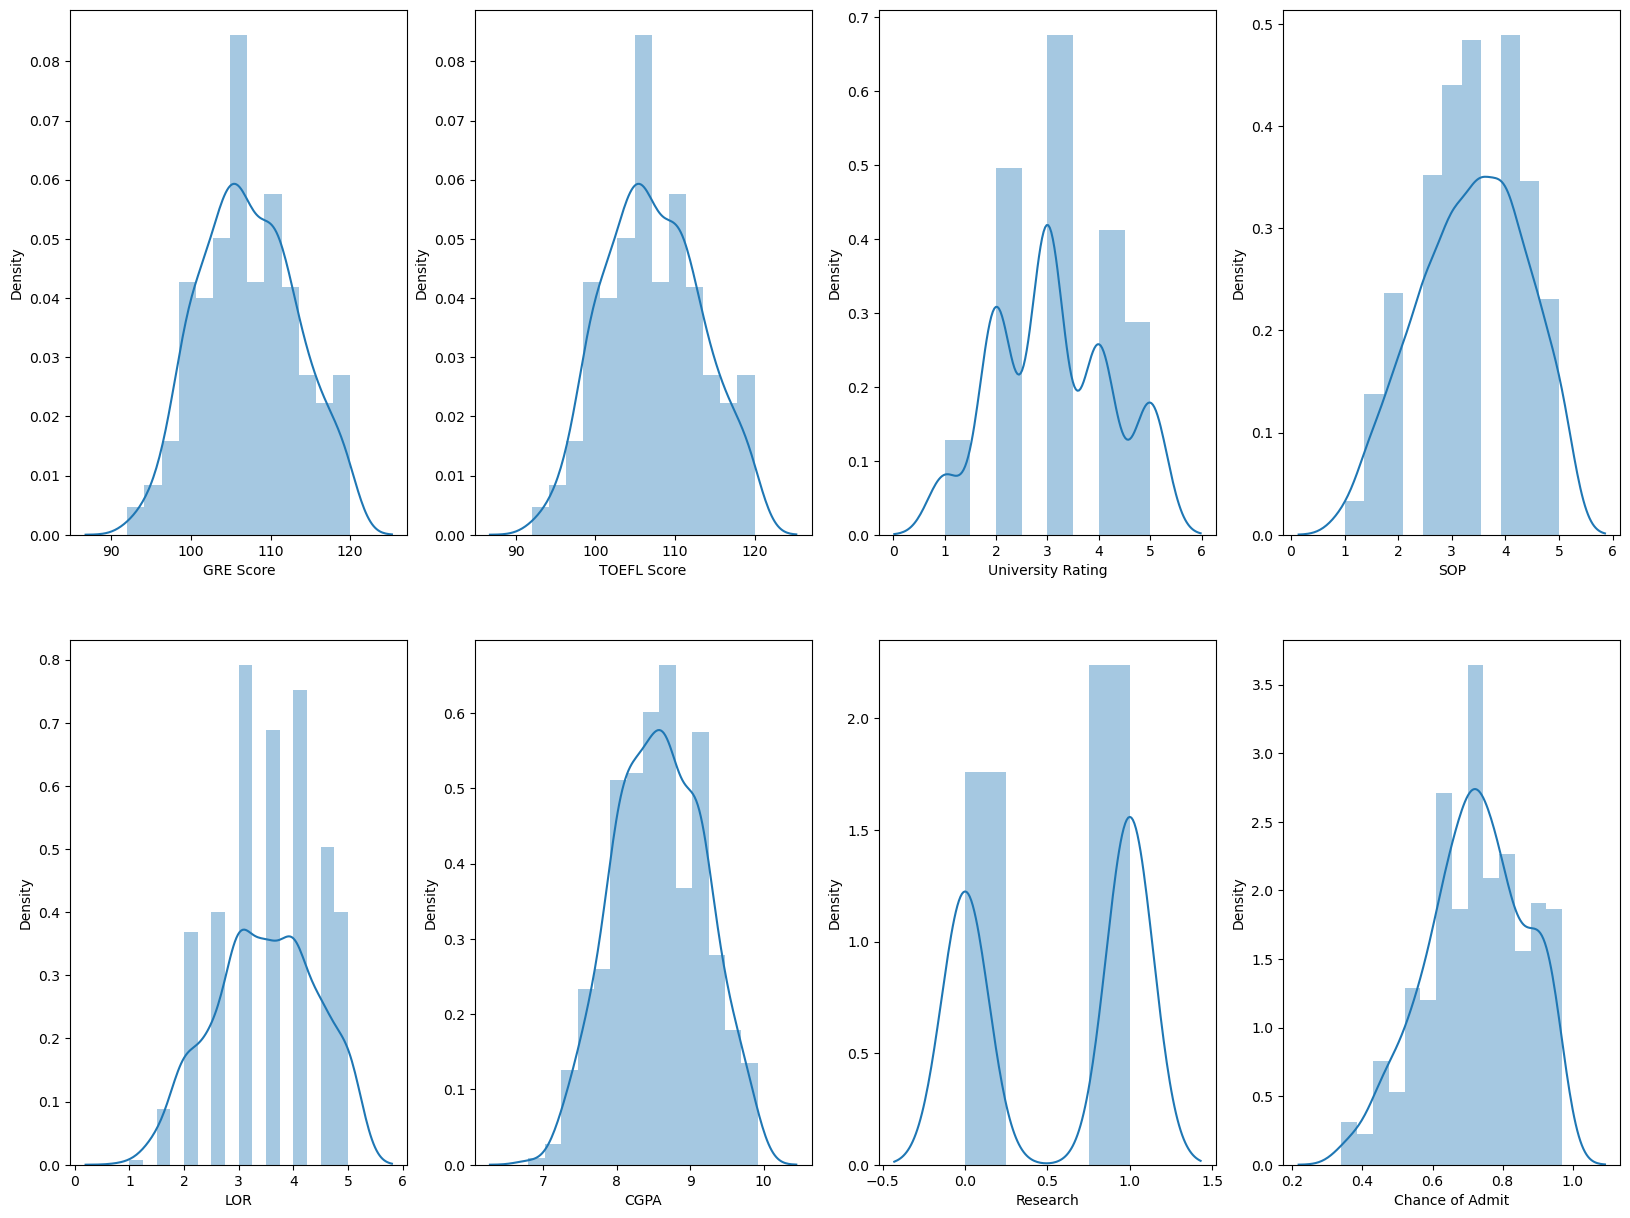

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20, 15))
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2, 4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

The data distribution looks decent enough and it doesn't seem to be any skewness here. let's go ahead!

let's observe the relationship between Independent and Dependent Variables.

In [9]:
#dividing data into features and label
y=data['Chance of Admit']
x=data.drop(columns=['Chance of Admit'])

In [10]:
#checking y
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [11]:
#checking x
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,118.0,118.0,4.0,4.5,4.5,9.65,1
1,107.0,107.0,4.0,4.0,4.5,8.87,1
2,104.0,104.0,3.0,3.0,3.5,8.00,1
3,110.0,110.0,3.0,3.5,2.5,8.67,1
4,103.0,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,108.0,108.0,5.0,4.5,4.0,9.02,1
496,117.0,117.0,5.0,5.0,5.0,9.87,1
497,120.0,120.0,5.0,4.5,5.0,9.56,1
498,103.0,103.0,4.0,4.0,5.0,8.43,0


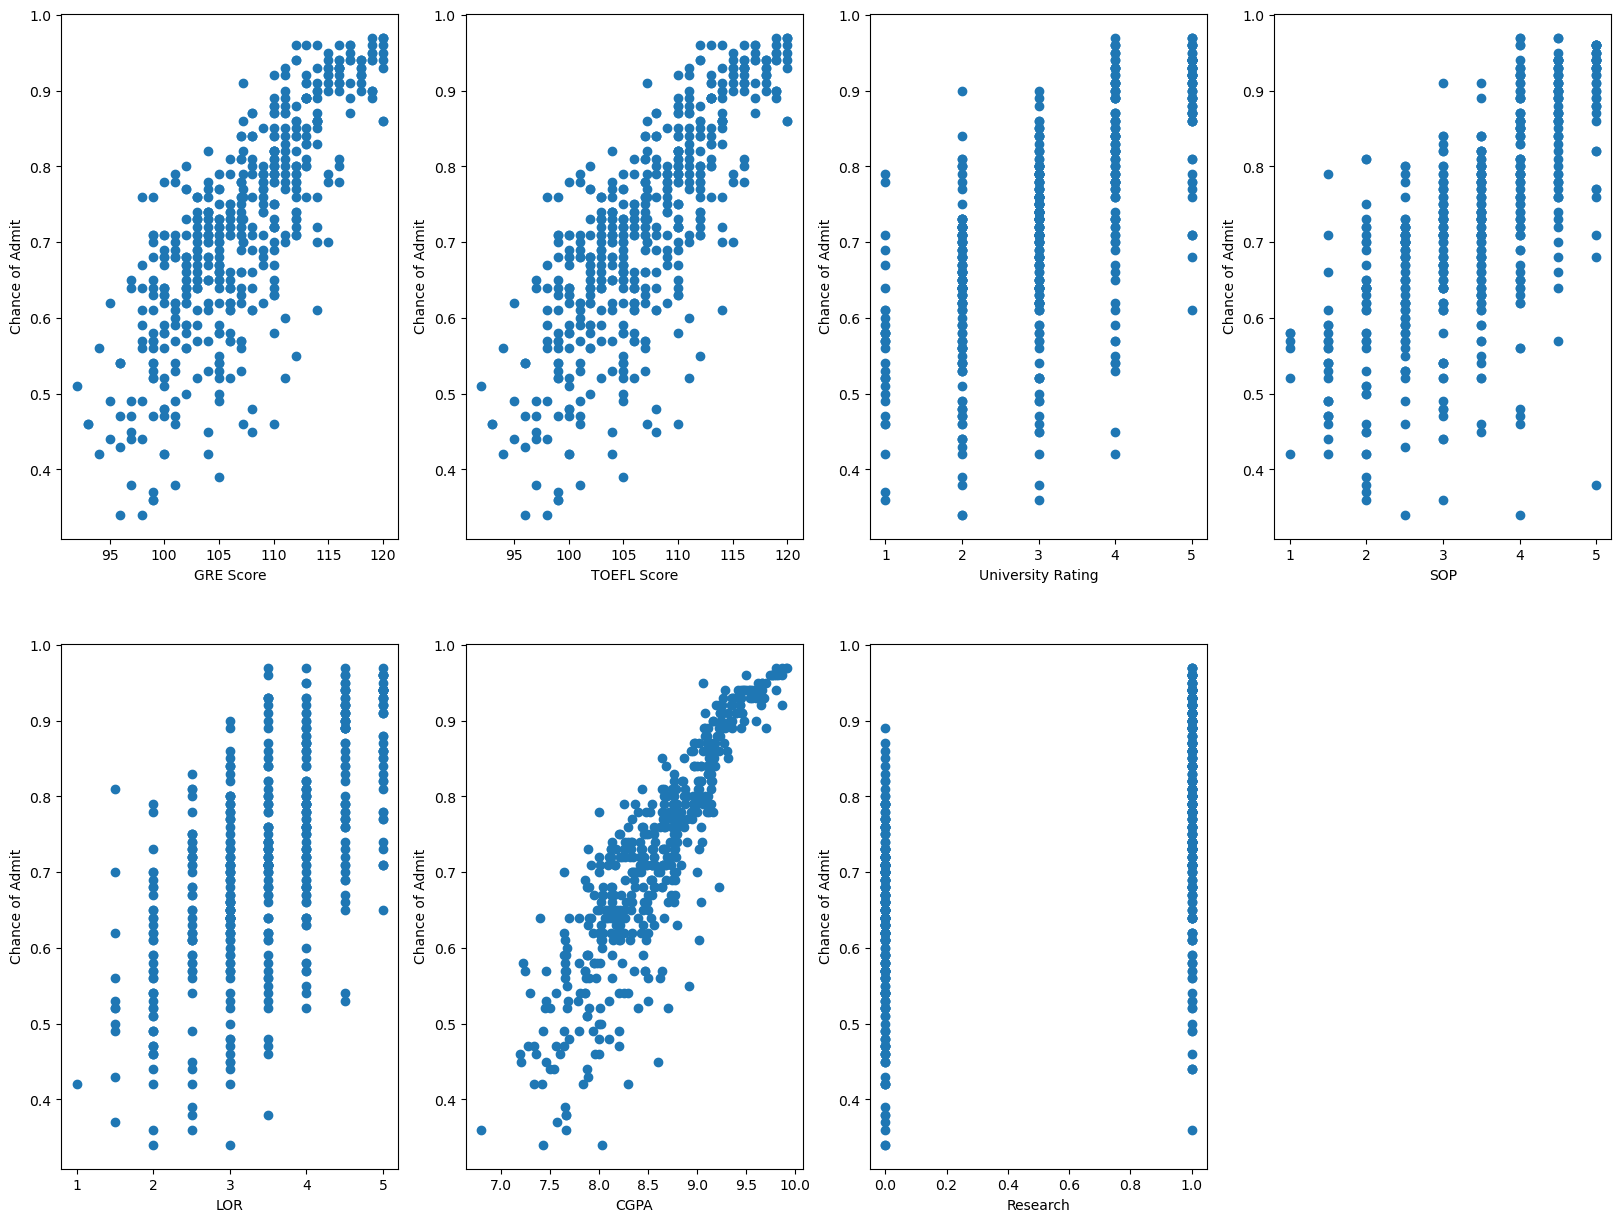

In [12]:
#visualising relationship
plt.figure(figsize=(20, 15))
plotnumber=1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2, 4, plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column)
        plt.ylabel('Chance of Admit')
    plotnumber+=1
plt.show()

Great! the relationship between Independent and Dependent variables look fairly linear, Linearity assumption satisfied.

In [13]:
#scaling the data (Formula z=(x-mean)/std)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [14]:
x_scaled

array([[ 1.78854223,  1.78854223,  0.78200955, ...,  1.09894429,
         1.77680627,  0.88640526],
       [-0.03105811, -0.03105811,  0.78200955, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.52731275, -0.52731275, -0.10462259, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 2.11937866,  2.11937866,  1.66864169, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.69273097, -0.69273097,  0.78200955, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.96145116,  0.96145116,  0.78200955, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [15]:
#Train Test Split
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=348)
y_train.head()

459    0.89
174    0.87
399    0.95
374    0.39
355    0.73
Name: Chance of Admit, dtype: float64

# Model instantiating and training

In [16]:
regression=LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

# Predict the chance of admission given features

In [17]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,103.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,113.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [19]:
#since we have already fit the scaler we can transform the data!
print("Chance of Admission is: ", regression.predict(scaler.transform([[327.0, 113.0, 4.0, 4.5, 4.5, 9.04, 0]])))

Chance of Admission is:  [1.28225104]


In [20]:
#saving the model to the local file system
pickle.dump(regression, open('regmodel', 'wb'))

In [21]:
#predition using saved model
loaded_model=pickle.load(open('regmodel', 'rb'))
a=loaded_model.predict(scaler.transform([[312, 204, 2, 2, 4, 8.21, 0]]))
a

array([1.32053723])

let's check how well model fits on trained data!

In [22]:
#Adjusted R2 score
regression.score(x_train, y_train)

0.8197972157093304

And on test data!

In [23]:
regression.score(x_test, y_test)

0.8016613673616255

Let's plot and Visualize

In [24]:
x_test[1]

array([0.79603295, 0.79603295, 0.78200955, 1.64240413, 1.09894429,
       1.79335687, 0.88640526])

In [25]:
y_pred=regression.predict(x_test)

In [26]:
y_pred

array([0.80889647, 0.92304404, 0.91145801, 0.59600247, 0.63718272,
       0.60807974, 0.82034039, 0.63798558, 0.77133768, 0.74075158,
       0.61340928, 0.51010727, 0.83078038, 0.46471316, 0.90211433,
       0.62561456, 0.73492957, 0.64368248, 0.82591125, 0.56256918,
       0.8177393 , 0.73893262, 0.63955902, 0.52744722, 0.57163604,
       0.46445937, 0.88260691, 0.78907882, 0.70176588, 0.41698841,
       0.81493448, 0.78781797, 0.6239675 , 0.66779168, 0.75118294,
       0.61423184, 0.80835882, 0.8108296 , 0.59236335, 0.67406744,
       0.72792246, 0.61746365, 0.85338957, 0.9638764 , 0.98160838,
       0.52524785, 0.78035215, 0.93271613, 0.62817417, 0.9471741 ,
       0.66275817, 0.63064677, 0.81839555, 0.71157106, 0.67515035,
       0.56232919, 0.42658688, 0.63406087, 0.68097626, 0.70399202,
       0.87188758, 0.67337651, 0.78026545, 0.65513801, 0.94445406,
       0.59269004, 0.72840226, 0.55600154, 0.57330269, 0.77889937,
       0.74078515, 0.64119127, 0.98856333, 0.66906978, 0.63485

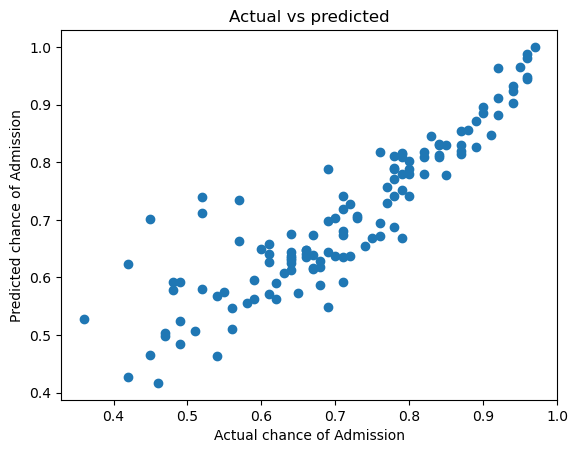

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual chance of Admission')
plt.ylabel('Predicted chance of Admission')
plt.title('Actual vs predicted')
plt.show()

# Model Evaluation

In [30]:
y_pred=regression.predict(x_test)

In [31]:
#MAE
mean_absolute_error(y_test, y_pred)

0.044716621193790655

In [32]:
#MSE
mean_squared_error(y_test, y_pred)

0.004125499411037139

In [33]:
#RMSE(Root Mean Squared Error)
np.sqrt(mean_squared_error(y_test, y_pred))

0.06423005068530725

Now let's check if our model is overfitting using Regularization.

Lasso Regularization

In [35]:
lasscv=LassoCV(alphas=None, max_iter=10)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=10)

In [36]:
#best alpha parameter
alpha=lasscv.alpha_
alpha

0.0009256271877954842

In [37]:
#now that we have the best parameter, let's use Lasso regularization and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0009256271877954842)

In [38]:
lasso_reg.score(x_train, y_train)

0.8195684978497184

Ridge Regularization

In [39]:
#ridgecv will return best alpha and coefficient after performing 10 cross validations!
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [40]:
#best alpha parameter
ridgecv.alpha_

0.09099999999999998

In [41]:
#fitting alpha
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.09099999999999998)

In [42]:
#model score
ridge_model.score(x_test, y_test)

0.8016863922078837

We got around same R2 score using both the regressions so it is safe to say that our model is not overfitting.

And we are done here!